# Computer Project for TMA4215

$$
\DeclareMathOperator{\Div}{div}
\DeclareMathOperator{\Grad}{grad}
\DeclareMathOperator{\Curl}{curl}
\DeclareMathOperator{\Rot}{rot}
\DeclareMathOperator{\ord}{ord}
\DeclareMathOperator{\Kern}{ker}
\DeclareMathOperator{\Image}{im}
\DeclareMathOperator{\spann}{span}
\DeclareMathOperator{\rank}{rank}
\DeclareMathOperator{\dist}{dist}
\DeclareMathOperator{\diam}{diam}
\DeclareMathOperator{\sig}{sig}
\DeclareMathOperator{\Id}{Id}
\DeclareMathOperator{\CQR}{CQR}
\DeclareMathOperator{\QR}{QR}
\DeclareMathOperator{\TR}{TR}
\DeclareMathOperator{\CTR}{CTR}
\DeclareMathOperator{\SR}{SR}
\DeclareMathOperator{\CSR}{CSR}
\DeclareMathOperator{\NCR}{NCR}
\DeclareMathOperator{\MR}{MR}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\NN}{\mathbb{N}}
\newcommand{\VV}{\mathbb{V}}
\newcommand{\PP}{\mathbb{P}}
\newcommand{\dGamma}{\,\mathrm{d} \Gamma}
\newcommand{\dGammah}{\,\mathrm{d} \Gamma_h}
\newcommand{\dx}{\,\mathrm{d}x}
\newcommand{\dy}{\,\mathrm{d}y}
\newcommand{\ds}{\,\mathrm{d}s}
\newcommand{\dt}{\,\mathrm{d}t}
\newcommand{\dS}{\,\mathrm{d}S}
\newcommand{\dV}{\,\mathrm{d}V}
\newcommand{\dX}{\,\mathrm{d}X}
\newcommand{\dY}{\,\mathrm{d}Y}
\newcommand{\dE}{\,\mathrm{d}E}
\newcommand{\dK}{\,\mathrm{d}K}
\newcommand{\dM}{\,\mathrm{d}M}
\newcommand{\cd}{\mathrm{cd}}
\newcommand{\onehalf}{\frac{1}{2}}
\newcommand{\bfP}{\boldsymbol P}
\newcommand{\bfx}{\boldsymbol x}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bfa}{\boldsymbol a}
\newcommand{\bfu}{\boldsymbol u}
\newcommand{\bfv}{\boldsymbol v}
\newcommand{\bfe}{\boldsymbol e}
\newcommand{\bfb}{\boldsymbol b}
\newcommand{\bfc}{\boldsymbol c}
\newcommand{\bfq}{\boldsymbol q}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bff}{\boldsymbol f}
\newcommand{\bfp}{\boldsymbol p}
\newcommand{\bft}{\boldsymbol t}
\newcommand{\bfj}{\boldsymbol j}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfV}{\boldsymbol V}
\newcommand{\bfE}{\boldsymbol E}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfzero}{\boldsymbol 0}
$$

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../../styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

## Part 1: The Poisson Equation


### Chapter 2: Rising to 2 dimensions

We consider 2-dimenionsal equivalent of the two-point boundary value problem, known as the __Poisson problem__:

Let $\Omega = [0,1]\times [0,1] \subset \RR^2$, and given
a right-hand side (or source) function $f: \Omega \to  \RR$
and a boundary function $g: \partial \Omega \to \RR$.
Here $\partial \Omega = \{0\} \times [0,1] \cup \{1\} \times [0,1]
\cup [0,1]  \times \{0\} \cup [0,1]  \times \{1\}$
denotes the boudary of $\Omega$. Then the task is to find
$u: \Omega \to  \RR$ such that
$$
\begin{align}
- \Delta u  &= f \quad \text{in } \Omega,
\tag{1a}
\\
 u &= g \quad \text{on } \partial \Omega.
\tag{1b}
\end{align}
$$

Recall that the Laplace operater $\Delta u$ is defined by
\begin{align*}
\Delta u(x,y) = 
\partial^2_{x} u(x,y) + \partial^2_{y} u(x,y)
= 
\dfrac{\partial^2}{\partial x^2} u(x,y) 
+\dfrac{\partial^2}{\partial y^2} u(x,y) 
\end{align*}

How do we compute a numerical solution to (1a)-(1b)?

### Finite Difference Method for the 2D Poisson problem

Instead of trying to compute $u(x)$ exactly,
we will now try to compute a numerical approximation
$u_{\Delta}$ of $u(x)$. In 1D, we introduced $n+1$ equally space grid points on $[0,1]$. Since we are in 2D now, we just apply the same procedure in every dimension and then create a 2D grid:

* Subdivide the $x$-axis,
and introduce $\{x_i\}_{i=0}^n$ with $x_i = i h$, $ h = \tfrac{1}{n}$
* Subdivide the $y$-axis,
and introduce $\{y_j\}_{j=0}^n$ with $y_j = j h$
* Defind the $N = (n+1)^2$ grid points $\{(x_i,y_j)\}_{i,j=0}^{n}$.

To each of the grid points $(x_i,y_j)$ we now assoicate
an unknow $U_{i,j}$  for $i,j=0,\ldots n $.

Below you see an illustration for the case $n=3$:

<img src="figures/fdm-grid-1.png" style="width:400px;height:410px"/>

To derive an equation system for the $U_{i,j}$, we take the same approach
as for the two-point value problem realizing that the  $\partial_x^2 u$ 
can be approximated by a central difference operator along the $x$-axis
\begin{align*}
\partial_x^+ \partial_x^- u(x_i, y_j)
:=  \dfrac{u(x_{i+1}, y_j) - 2 u(x_i,y_j) + u(x_{i-1}, y_j)}
{h^2}
\approx \partial_x^2 u(x_i, y_j),
\end{align*}
while keeping the $y$-variable fixed.

The same goes the other way around, so to approximate $\partial_y^2 u$ at $(x_i,y_j)$, we use the central difference operator along the $y$-axis
\begin{align*}
\partial_y^+ \partial_y^- u(x_i, y_j)
:=  \dfrac{u(x_{i}, y_{j+1}) - 2 u(x_i,y_j) + u(x_{i}, y_{j-1})}
{h^2}
\approx \partial_y^2 u(x_i, y_j),
\end{align*}
while keeping the $x$-variable fixed.

So in total, we obtain that
\begin{align*}
f(x_i,y_i) &=
- \Delta u(x_i, y_i) 
\\
&\approx
-\partial_x^+ \partial_x^- u(x_i, y_j)
-
\partial_y^+ \partial_y^- u(x_i, y_j)
\\
&=  -\dfrac{u(x_{i+1}, y_{j}) + u(x_{i}, y_{j+1}) - 4 u(x_i,y_j) + u(x_{i-1}, y_{j}) + u(x_{i}, y_{j-1})}
{h^2}
\end{align*}

Because of the index structure the finite difference operator $(\partial_x^+ \partial_x^- +  \partial_y^+ \partial_y^- )$ is also called __5-point stencil__.

#### Task 1
Similar as before, use Taylor expansion to show that
for 
$u \in C^4([0,1]^2)$

$$
\max_{(x,y) \in [0,1]^2} | (\partial_x^+ \partial_x^- +  \partial_y^+ \partial_y^- )u(x) - \Delta u(x,y) |
=
\mathcal{O}(h^2).
$$

<font color="blue">
    As before, write out the following taylor series to four terms:
    $$
    u(x, y \pm h) = u \pm h \partial_y u + \frac {h^2} 2 \partial_y^2 u \pm \frac {h^3} 6 \partial_y^3 u + \mathcal O(h^4)
    $$
    $$
    u(x \pm h, y ) = u \pm h \partial_x u + \frac {h^2} 2 \partial_x^2 u \pm \frac {h^3} 6 \partial_x^3 u + \mathcal O(h^4)
    $$
    where $h$ is the grid spacing, i. e summing over all of them gives the five-point stencil, except for the $-4u$ term. Notice that the terms in the $y$-series with odd powers of $h$ cancel out, and the same for the $x$-series.
    $$
    h^2(\partial_x^+ \partial_x^- +  \partial_y^+ \partial_y^- )u(x)
    = 4u + h^2\partial_y^2  u + h^2\partial_x^2 u - 4u + \mathcal O(h^4)
    = h^2\Delta u + \mathcal O(h^4)
    $$
    which gives the desired result
    $$
    (\partial_x^+ \partial_x^- +  \partial_y^+ \partial_y^- )u(x) - \Delta u = \mathcal O(h^2)
    $$
</font>

Using the 5-point stencil, we again get an equation system for the 
$(N-1)^2$ __internal grid points__ $\{(x_i, y_j\}_{i,j=1}^{n-1}$

\begin{align}
-(\partial_x^+ \partial_x^- + \partial_y^+\partial_y^-) U_{ij}
&=
\dfrac{4 U_{i,j} -  U_{i+1,j} - U_{i,j+1} - U_{i-1, j} -  U_{i, j-1}}{h^2}
\\
&=  f(x_i, y_j) =: F_{ij} \quad \text{for } i,j = 1,\ldots N-1.
\end{align}


As before (yes, we are repeating ourselves!) the system needs to closed by supplementing the equations for the boundary conditions.
We set the boundary conditions on the bottom and top of the square $[0,1]^2$ by requiring that
\begin{align}
U_{i,j} = g(x_i, y_j) \quad \text{for }  i=0,\ldots, n, j \in \{0,n\}.
\end{align}
and then treating the remaining boundary points on the left and right of $[0,1]^2$:
\begin{align}
U_{i,j} = g(x_i, y_j) \quad \text{for }  i \in \{0,n\}, j=1,\ldots, n-1.
\end{align}
How can we get from here to a nice looking linear system? 
We have used a double index, one for each dimension, so that we could easily 
reduce the discretization of $\Delta$ to the techniques we learned in Chapter 1 on 1D two-point boundary problems.

To avoid the introduction of multi-dimensional matrices, we need to
transform the double index $(i,j)$ into a single index by introducing
a consecutive numbering $I = I(i,j)$ of the the unknowns.

For example, the  row-wise numbering of the unknown is illustrated 
here:

<img src="figures/fdm-grid-2.png" style="width:400px;height:410px"/>

#### Task 2: 
Any consecutive numbering is nothing but a index mapping of the form $\NN^2 \ni (i,j) \mapsto I(i,j) \in \NN$.  Which of the following index mapping corresponds to the row-wise numbering illustrated above? 
1. $I(i,j) = i n + j \quad$ for $i,j = 0,\ldots, n$
2. $I(i,j) = i + j n\quad$ for $i,j = 0,\ldots, n$
3. $I(i,j) = i + j(n+1)$ for $i,j = 0,\ldots, n$
4. $I(i,j) = i(n-1) + j$ for $i,j = 0,\ldots, n$

Write also down the index mapping for column-wise numbering
(also known as lexicographical order)

<font color="blue">
Solution: $I(i,j) = i + j(n+1)$. For column-major indexing use $i(n+1) + j$.
</font>

#### Task 3
Now we implement a first FDM 2D solver. 

Start with defining a 1-line function ```I(i,j,n)```
which for $n$ equally spaced intervals in each direction
transforms an double index $(i,j)$ into a single index $I$
using a row-wise numbering.

In [10]:
# Define index mapping
def I(i,j,n):
    return i + j*(n+1)

Next, define a ```def fdm_poisson_2d_matrix_dense(n, I)```
which takes in $n$ and the index mapping $I$ and
computes the full finite difference matrix, including setting 
those diagonals elements to $1$ which correspond to an index 
on the boundary.

<font color="blue">
    Some notes to help me get the indexing right:
    $$
    -(\Delta U)_{ij} = F_{ij}
    $$
    becomes
    $$
    -h^2(\Delta U)_{I(i, j)} = 4 U_{I(i, j)}
          - U_{I(i+1, j)}
          - U_{I(i-1, j)}
          - U_{I(i, j+1)}
          - U_{I(i, j-1)}
    = h^2F_{I(i,j)}
    $$
    for a matrix $\Delta$ and a vector $U$, the definition of a matrix product states
    $$
    (\Delta U)_\alpha = \sum_\beta \Delta_{\alpha \beta} U_\beta
    $$
    in our case, $\Delta$ is the discrete laplacian, and it is a $n^2 \times n^2$ matrix,
    since it maps samples of $n\times n$ grids to a new $n \times n$ grid, with a specific
    indexing $I$. Now we just mix and match indeces to match the first equation, where
    $\alpha = I(i, j)$:
    $$
    -(\Delta U)_{I(i,j)} = \sum_\beta (-\Delta_{I(i,j), \beta}) U_\beta \\
    $$
    Comparing the formulas, it is clear that $-\Delta_{I(i,j),I(i,j)} = 4/h^2$,
    and $-\Delta_{I(i,j),I(i\pm 1,j)} = -1/h^2$, and also
    $-\Delta_{I(i,j),I(i,j \pm 1)} = -1/h^2$.
    This is right for all internal points. On the edge we need to supplement with the boundary
    condition: $-\Delta_{I(i,j),I(i,j)} = 1$ if $i,j$ correspond to a boundary point.
</font>

In [1]:
import numpy as np

def fdm_poisson_2d_matrix_dense(n, I):
    # Gridsize
    h = 1.0/n
    
    # Total number of unknowns is N = (n+1)*(n+1)
    N = (n+1)**2

    # Define zero matrix A of right size and insert 0
    A = np.zeros([N, N])
    
    # Define FD entries of A
    hh = h*h
    for i in range(1, n):
        for j in range(1, n):
            A[I(i,j,n), I(i,j,n)]   =  4/hh
            A[I(i,j,n), I(i+1,j,n)] = -1/hh
            A[I(i,j,n), I(i-1,j,n)] = -1/hh
            A[I(i,j,n), I(i,j+1,n)] = -1/hh
            A[I(i,j,n), I(i,j-1,n)] = -1/hh
            
    # Incorporate boundary conditions
    # Add boundary values related to unknowns from the first and last grid ROW
    for j in [0,n]:
        for i in range(0,n+1):
            A[I(i,j,n),I(i,j,n)] = 1
            A[I(j,i,n),I(j,i,n)] = 1
    
    return A

Now try to numerically solve the Poisson problem. 
We will learn a few new functions from the ```numpy``` module
along the way.

In [2]:
# Number of subdivisions in each dimension
n = 32

# To define the grid we could use "linspace" as 
# in the first part to define subdivisions for 
# the $x$ and $y$ axes. But to make plotting easy
# and to vectorize the evaluation of the right-hand 
# side $f$, we do something more fancy. We define 
# x and y coordinates for the grid using a 
# "sparse grid" representation using the function 'ogrid'.
# (Read the documentation for 'ogrid'!). 
# Unfortunately, ogrid does not include the interval 
# endpoints by 
# default, but according to the numpy documentation, 
# you can achieve this by multiplying your sampling number by
# the pure imaginary number $i = \sqrt{-1}$  which is written as "1j" in Python code.
# So simply speaking "(N+1)*1j" reads "include the end points"
# while (N+1) reads "exclude the end points".

x,y = np.ogrid[0:1:(n+1)*1j, 0:1:(n+1)*1j]
# Print x and y to see how they look like!
#print(x)
#print(y)

To build a complete example and test your code, use again the method of __manufactured solution__.

In [3]:
# Example of exact solution
def u_ex(x, y):
    return np.sin(1*np.pi*x)*np.sin(2*np.pi*y)

# Boundary data g is given by u_ex
g = u_ex

# Right hand side
def f(x, y):
    return 5*(np.pi**2)*np.sin(np.pi*x)*np.sin(2*np.pi*y)

# Evaluate u on the grid. The output will be a 2 dimensional array 
# where U_ex_grid[i,j] = u_ex(x_i, y_j)
U_ex_grid = u_ex(x,y)

# Print f_grid  to see how it looks like!
#print(U_ex_grid)

Here is a little helper functions for plotting grid functions like ```U_grid```.

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def plot2D(X, Y, Z, title=""):
    # Define a new figure with given size an
    fig = plt.figure(figsize=(8, 6), dpi=100)
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z,             
                           rstride=1, cstride=1, # Sampling rates for the x and y input data
                           cmap=cm.viridis)      # Use the new fancy colormap viridis
    
    # Set initial view angle
    ax.view_init(30, 225)
    
    # Set labels and show figure
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title(title)
    plt.show()

Now try it out to plot $u_{ex}$.

<IPython.core.display.Javascript object>


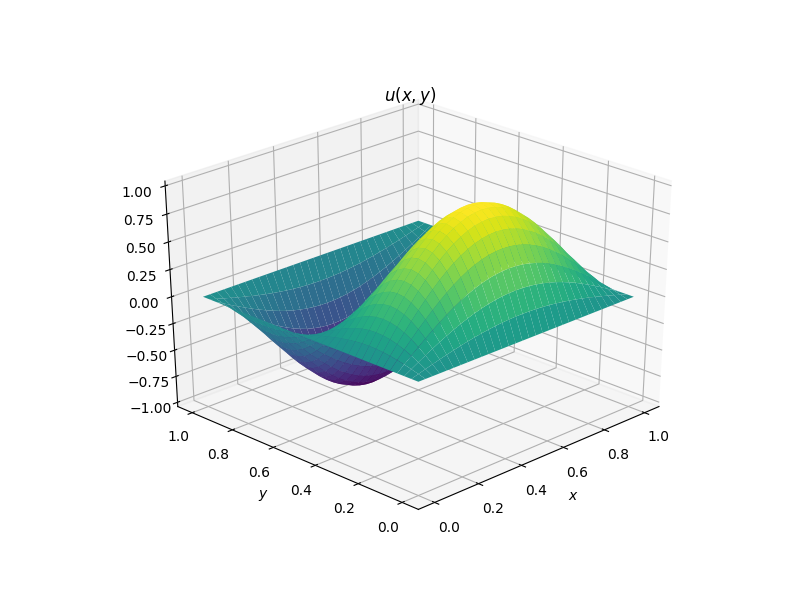

In [5]:
%matplotlib notebook 

plot2D(x, y, U_ex_grid, title="$u(x,y)$")

You can do the same for right-hand side $f$ and the 
boundary function $g$.

In [6]:
# Evaluate f on the grid. The output will be a 2 dimensional array 
# where f_grid[i,j] = f(x_i, y_j)
F_grid = f(x,y)

# Same game for boundary data g
G_grid = g(x,y)

Before we finally going to solve the Poisson problem,
we need translate the ```F_grid``` into a proper rhs vector $F$
and need to incorporate the boundary function value into $F$.

Start with flatten out $F$ and $G$:

In [7]:
# To apply bcs we have to flatten out F which is done by the ravel function
F = F_grid.ravel()

# To apply bcs we have to flatten out G which is done by the ravel function
G = G_grid.ravel()

Also, we define a function incorporating the values of ```G``` into ```F```.

In [8]:
def apply_bcs(F, G, n, I):
    # Add boundary values related to unknowns from the first and last grid ROW
    bc_indices = [ I(i,j,n)  for j in [0, n] for i in range(0, n+1) ]
    F[bc_indices] = G[bc_indices]  

    # Add boundary values related to unknowns from the first and last grid COLUMN
    bc_indices = [ I(i,j,n)  for i in [0, n] for j in range(0, n+1) ]
    F[bc_indices] = G[bc_indices]
    
    return F

Finally, solve the Poisson problem.

<IPython.core.display.Javascript object>


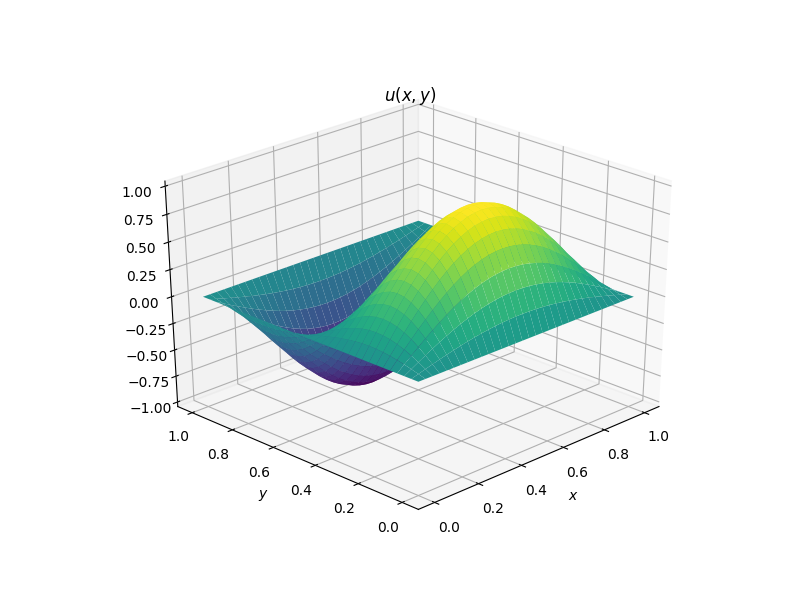

In [11]:
# Linear algebra solvers from scipy
import scipy.linalg as la

# Compute the FDM matrix
A = fdm_poisson_2d_matrix_dense(n, I)

# Apply bcs
F = apply_bcs(F, G, n, I)

# Solve 
U = la.solve(A, F)

# Make U into a grid function for plotting
U_grid = U.reshape((n+1,n+1))

# and plot f
plot2D(x, y, U_grid, title="$u(x,y)$")

#### Task 4
Use the method of manufactured solution together with the given analytical reference solution $u_{ex}$ to compute the experimental order of convergence (EOC)
for $N = 16, 32, 64$ using $\max_{i} |U-u|$ as error measure. Summarize your results in a table. 
What convergence rate do you get? If you don't get an EOC very close to $2$, find the bugs in your code :)

In [13]:
# im assuming n = 16,32,64 is meant, since N=32 doesn't correspond to a square lattice
errs = []
ns = [16, 32, 64]

for n in ns:
    x,y = np.ogrid[0:1:(n+1)*1j, 0:1:(n+1)*1j]

    U_ex_grid = u_ex(x,y)
    
    F_grid = f(x,y)
    G_grid = g(x,y)

    F = F_grid.ravel()
    G = G_grid.ravel()
    
    A = fdm_poisson_2d_matrix_dense(n, I)

    F = apply_bcs(F, G, n, I)

    U = la.solve(A, F)

    U_grid = U.reshape((n+1,n+1))
    
    eps = np.max(np.abs(U_grid - U_ex_grid))
    
    errs.append(eps)
    
print("EOC")
eocs = []
for i in range(1, len(ns)):
    log_eps = np.log(errs[i]) - np.log(errs[i-1])
    log_dn  = np.log(ns[i-1]) - np.log(ns[i])
    eoc     = log_eps / log_dn
    eocs.append(eoc)
    print(f"n = {ns[i]:2}, EOC(n) = {eoc:1.4}")
print(f"mean EOC = {np.mean(eocs):1.4}")

EOC
n = 32, EOC(n) = 2.007
n = 64, EOC(n) = 2.002
mean EOC = 2.004


####  Task 5 
Test how large you can chose the resolution $n$ until either the problem takes too long (say 5 minutes) to compute or uses too much memory. 

Can you explain why the problem
scales so badly with respect to number of unknowns $N = (n+1)^2$? 

<font color="blue">
On my machine, $n=128$ runs fine in less than a minute, but $n=256$ runs out of memory.
Obviously, a whole bunch of memory is required, since the discrete $\Delta$ has dimensions
$N \times N$, and $N$ is in turn approximately $n^2$. This makes the algorithm use (at least) something like
$\mathcal O(n^4)$ memory, for storing almost exclusively zeroes.
</font>

#### Task 6 

Based on your implementation above, we now implement an improved finite difference solver  using __sparse matrices__. Sparse matrices only store the
non-zero elements of a matrix. Note that the number of non-zero elements in
the finite difference matrix scales like $N$ and not like $N^2$ like __full matrices__.

Knowing the structure and entries of the matrix a priori, the most efficient 
realization would be based on (block) tridiagonal sparse matrices. 
But to allow for minimal adjustments of your previous solver implementation, we simply switch to a flexible sparse matrix format 

To this end you have change only 3 lines of code and incorporate the following code snippets into your previous code. For comparision you may want to define
a separate function ```fdm_poisson_2d_matrix_sparse(n, I)```.

In [18]:
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve

def fdm_poisson_2d_matrix_sparse(n, I):
    # Gridsize
    h = 1.0/n
    
    # Total number of unknowns is N = (n+1)*(n+1)
    N = (n+1)**2

    # Define zero matrix A of right size and insert 0
    A = sp.dok_matrix((N, N))
    
    # Define FD entries of A
    hh = h*h
    for i in range(1, n):
        for j in range(1, n):
            A[I(i,j,n), I(i,j,n)]   =  4/hh
            A[I(i,j,n), I(i+1,j,n)] = -1/hh
            A[I(i,j,n), I(i-1,j,n)] = -1/hh
            A[I(i,j,n), I(i,j+1,n)] = -1/hh
            A[I(i,j,n), I(i,j-1,n)] = -1/hh
            
    # Incorporate boundary conditions
    # Add boundary values related to unknowns from the first and last grid ROW
    for j in [0,n]:
        for i in range(0,n+1):
            A[I(i,j,n),I(i,j,n)] = 1

    # Add boundary values related to unknowns from the first and last grid COLUMN
    for i in [0,n]:
        for j in range(0,n+1):
            A[I(i,j,n),I(i,j,n)] = 1
    
    A_csr = A.tocsr() 
    return A_csr

In [26]:
%%timeit
n = 1024
x,y = np.ogrid[0:1:(n+1)*1j, 0:1:(n+1)*1j]

U_ex_grid = u_ex(x,y)

F_grid = f(x,y)
G_grid = g(x,y)

F = F_grid.ravel()
G = G_grid.ravel()

A = fdm_poisson_2d_matrix_sparse(n, I)

F = apply_bcs(F, G, n, I)

U = spsolve(A, F)

U_grid = U.reshape((n+1,n+1))

2min 37s ± 30.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


<font color="blue">
$n=128$ now runs in 1.2 seconds (opposed to around 50).
$n=1024$ runs in 2 minutes and 37 seconds on my machine, something that
    would be completely inconcievable with the old algorithm.
</font>

### Code Snippets

Get access to sparse matrices and sparse solvers.

In [ ]:
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve

Use a sparse matrix format for $A$, see 
https://docs.scipy.org/doc/scipy-1.3.0/reference/sparse.html
for the many formats which are available. Here we use "dictionary of keys" based representation which is an empty matrix to begin with and which can easily filled with non-zero values at the appropriate places.

In [ ]:
A = sp.dok_matrix((N, N))

After creating the matrix we have to convert it to a different format, the so-called
"Compressed Sparse Row matrix" representation, which is much more efficient when solving the system $A U = F$ with a sparse solver.
see https://docs.scipy.org/doc/scipy-1.3.0/reference/generated/scipy.sparse.linalg.spsolve.html

In [ ]:
# Now convert A to format which is more efficient for solving
A_csr = A.tocsr() 
U = spsolve(A_csr, F)

#### Task 7 

Measure and compare the overall solution time for your two implementations 'fdm_poisson_2d_dense' and 'fdm_poisson_2d_sparse' by using the cell magic command %%timeit.